In [1]:
#Importing libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading data from CSV file
df=pd.read_csv(r"C:\Users\Abhis\Downloads\loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
#Dropping coulnms
df=df.drop(columns=['Loan_ID'])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

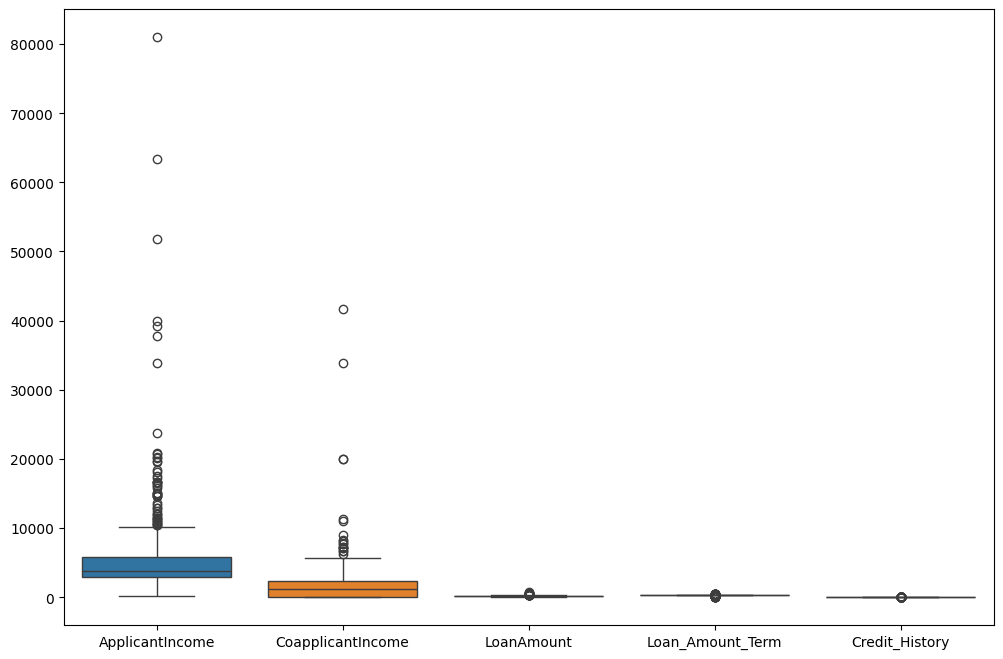

In [9]:
#Visualizing outliers
plt.figure(figsize=(12,8))
sns.boxplot(data=df)

In [10]:
#Filling null values in numerical columns 
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())

In [11]:
#Filling null values in categorical columns
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [13]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

<Axes: xlabel='Loan_Status'>

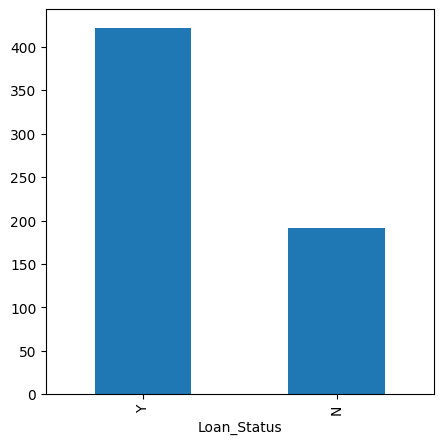

In [15]:
#Visualizing Loan Status Count
df['Loan_Status'].value_counts().plot.bar(figsize=(5,5))

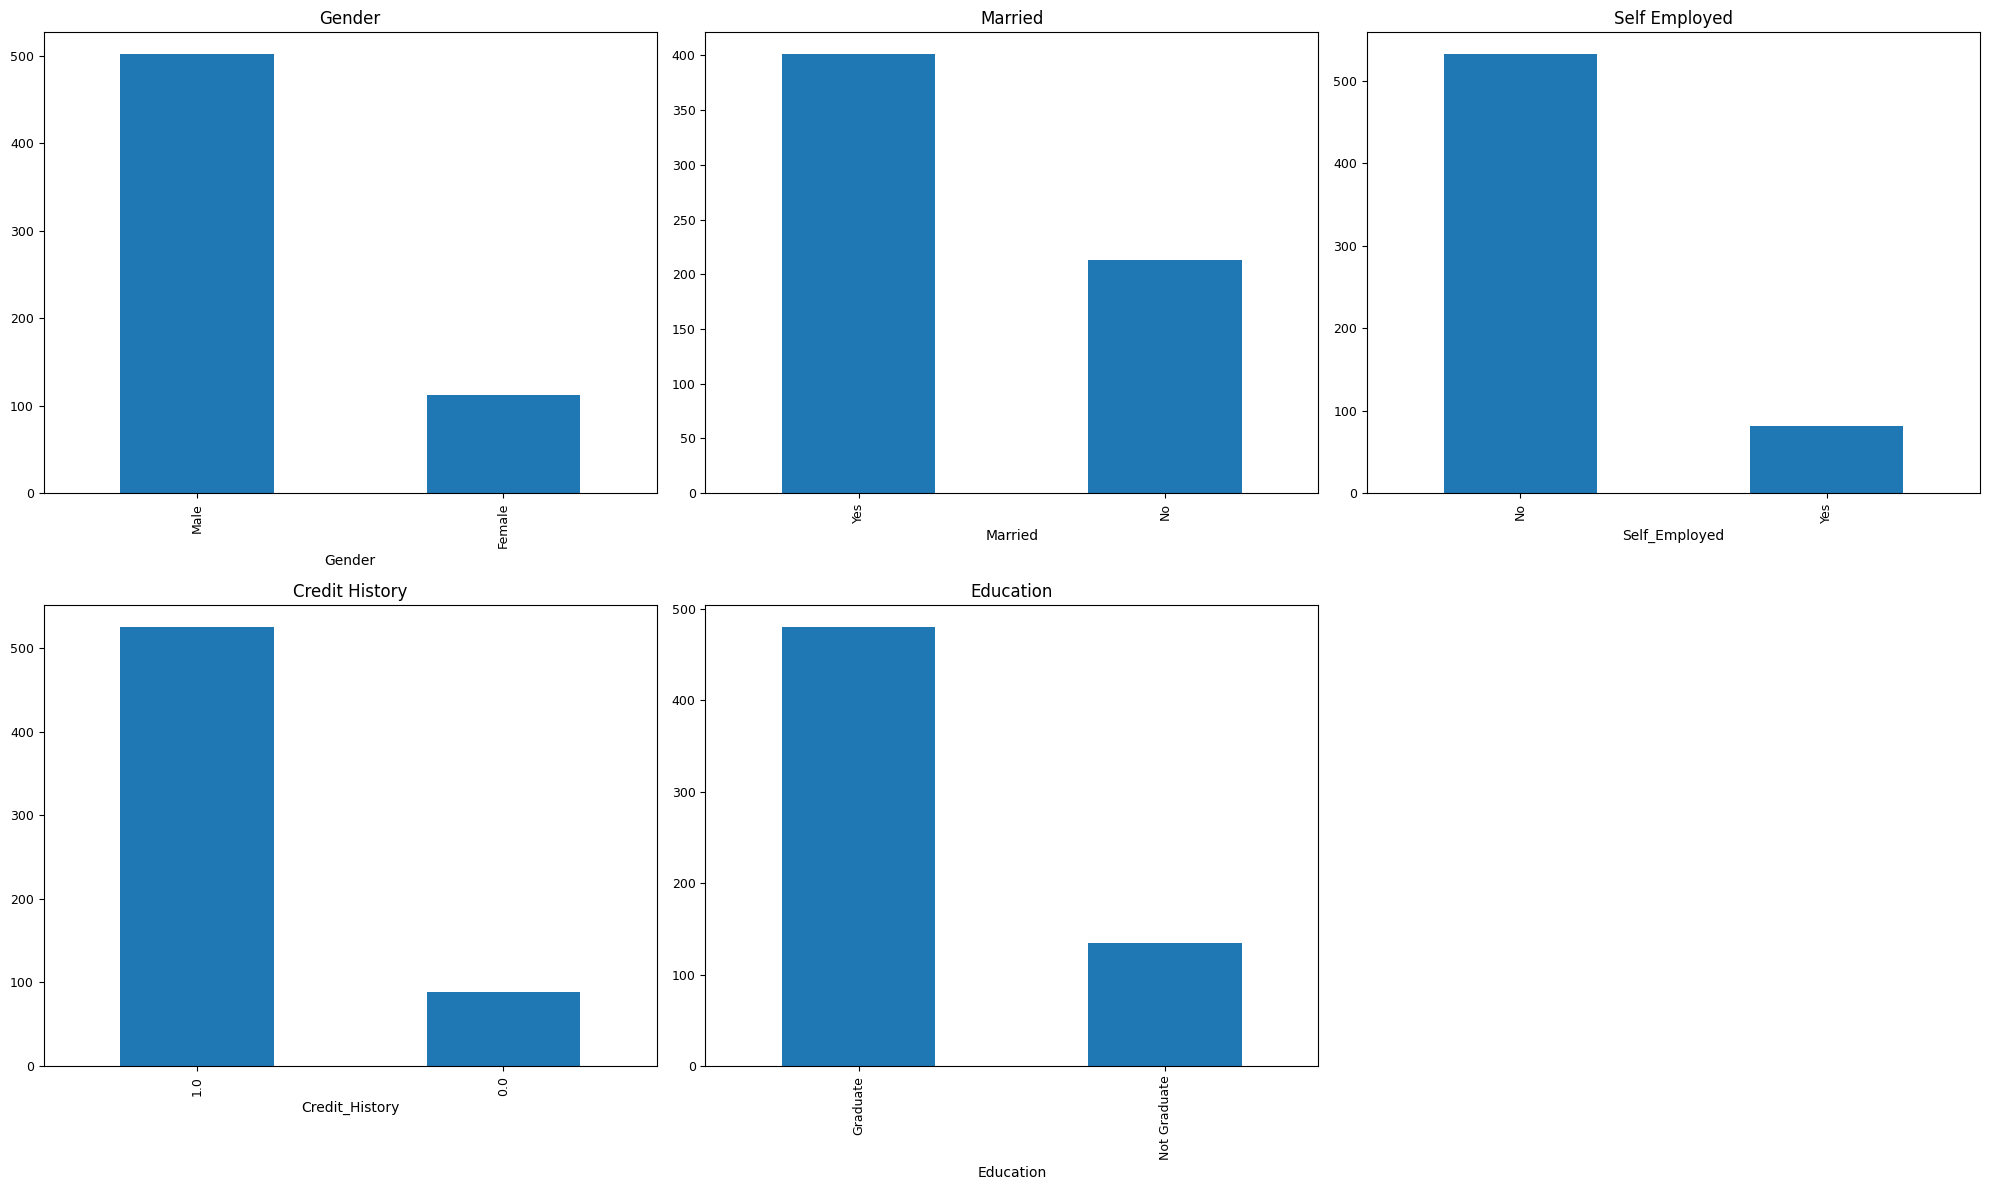

In [16]:
#Visualizing Categorical features
plt.rcParams.update({
    'axes.titlesize':12,
    'axes.labelsize':10,
    'xtick.labelsize':9,
    'ytick.labelsize':9
})
plt.subplot(231)
df['Gender'].value_counts().plot.bar(figsize=(20,12),title='Gender')

plt.subplot(232)
df['Married'].value_counts().plot.bar(title='Married')

plt.subplot(233)
df['Self_Employed'].value_counts().plot.bar(title='Self Employed')

plt.subplot(234)
df['Credit_History'].value_counts().plot.bar(title='Credit History')

plt.subplot(235)
df['Education'].value_counts().plot.bar(title='Education')


plt.tight_layout()
plt.show()


Text(0, 0.5, 'Frequency')

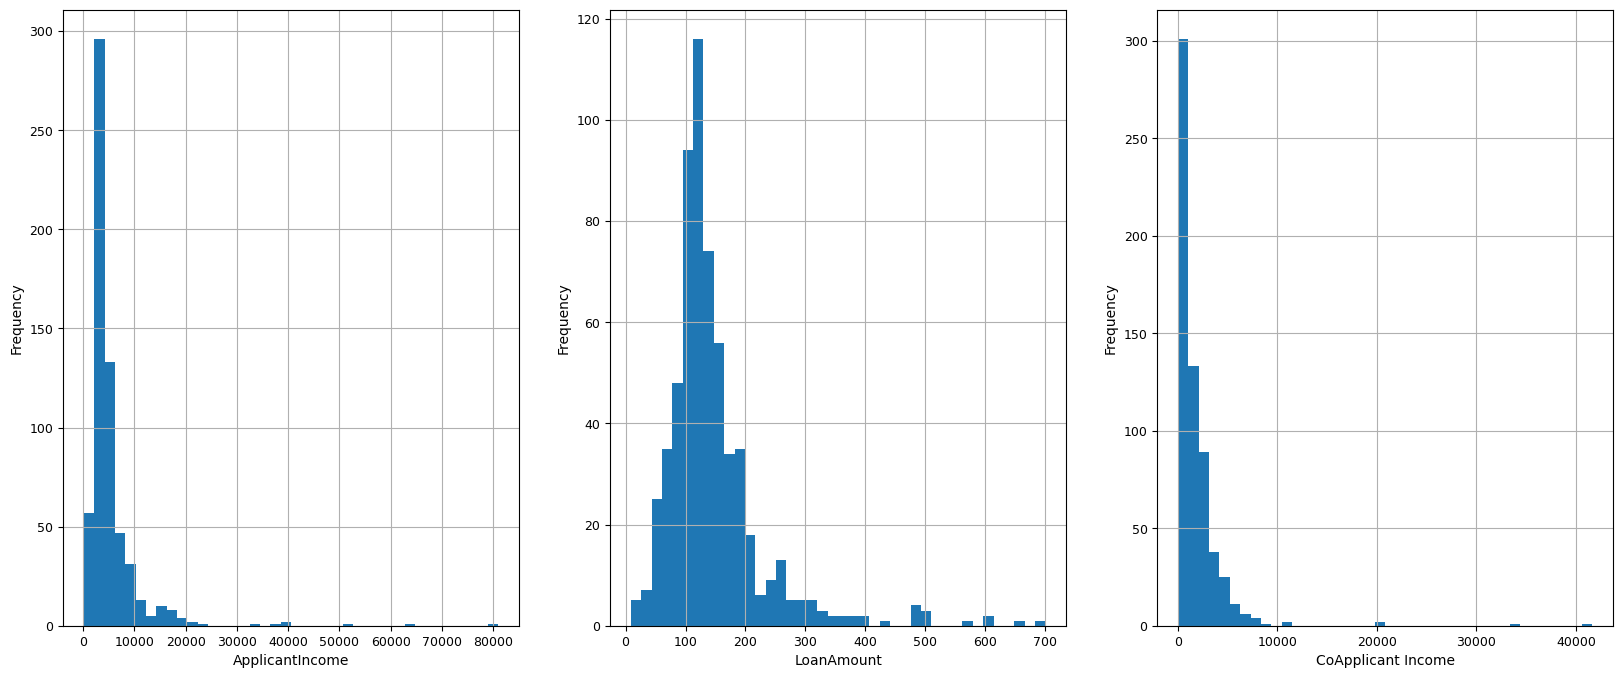

In [17]:
#Visualizing Numerical features
plt.subplot(131)
df['ApplicantIncome'].hist(figsize=(20,8),bins=40)
plt.xlabel('ApplicantIncome')
plt.ylabel('Frequency')

plt.subplot(132)
df['LoanAmount'].hist(bins=40)
plt.xlabel('LoanAmount')
plt.ylabel('Frequency')

plt.subplot(133)
df['CoapplicantIncome'].hist(bins=40)
plt.xlabel('CoApplicant Income')
plt.ylabel('Frequency')


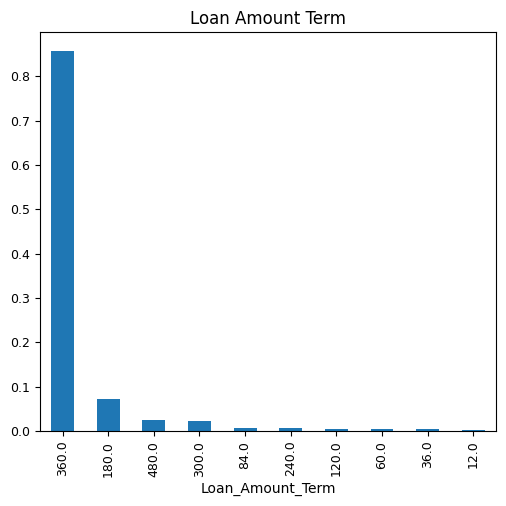

In [18]:
#
plt.figure(figsize=(5,5))
df['Loan_Amount_Term'].value_counts(normalize = 'True').plot(kind = 'bar', title='Loan Amount Term')
plt.tight_layout(pad=0.5)

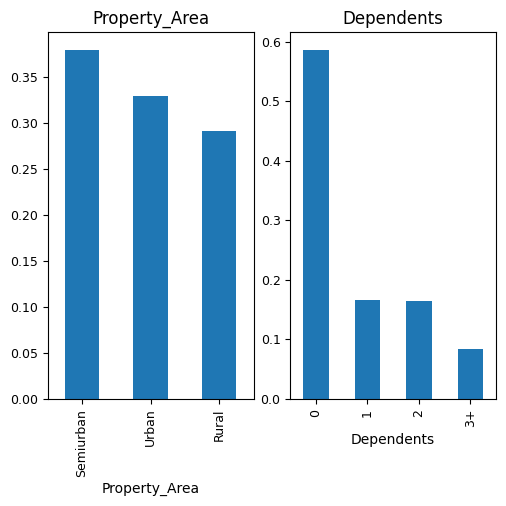

In [19]:
plt.figure(figsize=(5,5))
plt.subplot(121)
df.Property_Area.value_counts(normalize=True).plot(kind = 'bar',title = "Property_Area")
plt.tight_layout(pad=0.5)
plt.subplot(122)
df.Dependents.value_counts(normalize = True).plot(kind='bar',title="Dependents")
plt.tight_layout(pad=0.5)

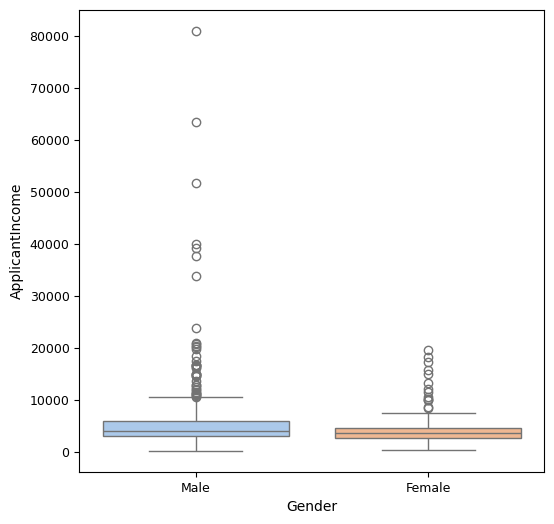

In [20]:
#Applicant Income by gender
plt.figure(figsize = (6,6))
sns.boxplot(data=df, x='Gender',y='ApplicantIncome',hue="Gender",palette='pastel',legend=False)
plt.xlabel('Gender')
plt.ylabel('ApplicantIncome')
plt.show()

<Axes: xlabel='Property_Area', ylabel='count'>

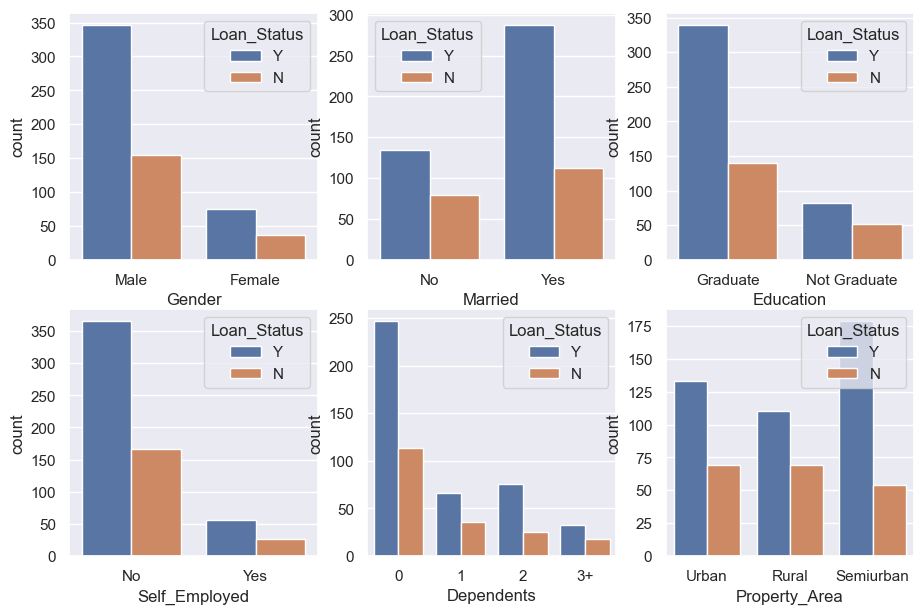

In [21]:
#Visualizing Categorical independent variables vs target variable
sns.set(rc={'figure.figsize':(10.9,10.9)})
plt.subplot(331)
sns.countplot(x="Gender", hue='Loan_Status', data=df)
plt.subplot(332)
sns.countplot(x="Married", hue='Loan_Status', data=df)
plt.subplot(333)
sns.countplot(x="Education", hue='Loan_Status', data=df)
plt.subplot(334)
sns.countplot(x="Self_Employed", hue='Loan_Status', data=df)
plt.subplot(335)
sns.countplot(x="Dependents", hue='Loan_Status', data=df)
plt.subplot(336)
sns.countplot(x="Property_Area", hue='Loan_Status', data=df)

<Axes: xlabel='Loan_Status', ylabel='Loan_Amount_Term'>

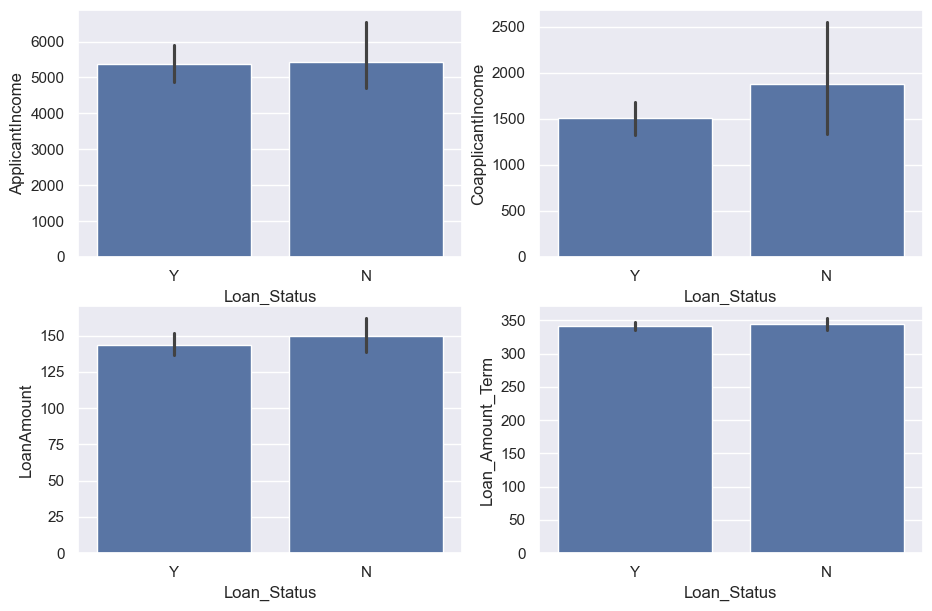

In [22]:
sns.set(rc={'figure.figsize':(10.9,10.9)})
plt.subplot(321)
sns.barplot(x="Loan_Status", y='ApplicantIncome', data=df)
plt.subplot(322)
sns.barplot(x="Loan_Status", y='CoapplicantIncome', data=df)
plt.subplot(323)
sns.barplot(x="Loan_Status", y='LoanAmount', data=df)
plt.subplot(324)
sns.barplot(x="Loan_Status", y='Loan_Amount_Term', data=df)

In [23]:
#Label Encoding
df["Gender"] = le.fit_transform(df["Gender"])
df["Married"] = le.fit_transform(df["Married"])
df["Education"] = le.fit_transform(df["Education"])
df["Self_Employed"] = le.fit_transform(df["Self_Employed"])
df["Property_Area"] = le.fit_transform(df["Property_Area"])
df["Loan_Status"] = le.fit_transform(df["Loan_Status"])

In [24]:
df["Dependents"] = df["Dependents"].replace('3+',int(3))
df["Dependents"] = df["Dependents"].replace('1',int(1))
df["Dependents"] = df["Dependents"].replace('2',int(2))
df["Dependents"] = df["Dependents"].replace('0',int(0))
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [25]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163103,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.046632,-0.033214
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.001963,0.540556


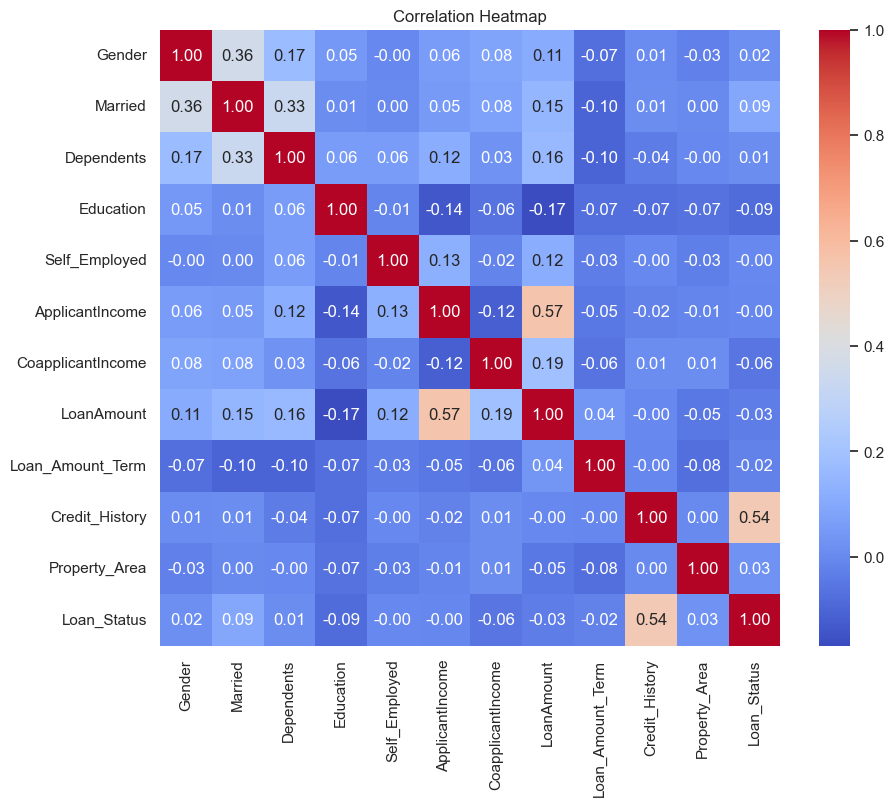

In [26]:
# calculate and visualize correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [27]:
#Dividing data into Input X variables and Target Y variable
x= df.drop(["Loan_Status"],axis=1)
y = df["Loan_Status"]

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
x.shape, y.shape

((614, 11), (614,))

In [30]:
#Feature Scaling
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
x_train
x_test

array([[ 0.48339253,  0.75744171, -0.72327513, ...,  0.28761093,
         0.40776315, -0.04695148],
       [ 0.48339253,  0.75744171, -0.72327513, ...,  0.28761093,
         0.40776315, -0.04695148],
       [ 0.48339253,  0.75744171,  1.26068067, ...,  0.28761093,
         0.40776315, -1.32768354],
       ...,
       [ 0.48339253,  0.75744171,  0.26870277, ...,  2.08198154,
         0.40776315, -0.04695148],
       [ 0.48339253,  0.75744171,  1.26068067, ...,  0.28761093,
         0.40776315,  1.23378058],
       [ 0.48339253,  0.75744171, -0.72327513, ..., -2.40394498,
         0.40776315,  1.23378058]])

In [31]:
#Fitting various models to know which one is more accurate
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print("Logistic Regression results")
print('Accuracy Score: ', accuracy_score(y_test,pred_lr)*100)
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_lr))
print('Classification Report:\n',classification_report(y_test,pred_lr))

Logistic Regression results
Accuracy Score:  78.86178861788618
Confusion Matrix:
 [[18 25]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [32]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
print("Dicision Tree results")
print('Accuracy Score: ', accuracy_score(y_test,pred_dt)*100)
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_dt))
print('Classification Report:\n',classification_report(y_test,pred_dt))

Dicision Tree results
Accuracy Score:  69.10569105691057
Confusion Matrix:
 [[23 20]
 [18 62]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.53      0.55        43
           1       0.76      0.78      0.77        80

    accuracy                           0.69       123
   macro avg       0.66      0.65      0.66       123
weighted avg       0.69      0.69      0.69       123



In [33]:
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)
print("Random Forest results")
print('Accuracy Score: ', accuracy_score(y_test,pred_rf)*100)
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_rf))
print('Classification Report:\n',classification_report(y_test,pred_rf))

Random Forest results
Accuracy Score:  74.79674796747967
Confusion Matrix:
 [[18 25]
 [ 6 74]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.42      0.54        43
           1       0.75      0.93      0.83        80

    accuracy                           0.75       123
   macro avg       0.75      0.67      0.68       123
weighted avg       0.75      0.75      0.73       123



In [34]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print("KNN results")
print('Accuracy Score: ', accuracy_score(y_test,pred_knn)*100)
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_knn))
print('Classification Report:\n',classification_report(y_test,pred_knn))

KNN results
Accuracy Score:  75.60975609756098
Confusion Matrix:
 [[17 26]
 [ 4 76]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.40      0.53        43
           1       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.78      0.67      0.68       123
weighted avg       0.77      0.76      0.73       123



Here, we can see that linear regression is more accurate so, we will predict our model by using linear regression

In [35]:
#Making a predictive system
input_data=(1,1,0,1,0,5000,1500.0,120.0,360.0,1.0,2)
input_data_as_array=np.asarray(input_data).reshape(1,-1)

#Trasforming the input data
sc_input_data=sc.transform(input_data_as_array)
prediction=lr.predict(sc_input_data)
if (prediction[0]==1):
    print('Prediction:','Loan Approved')
else:
    print('Prediction:','Loan Not approved')

Prediction: Loan Approved
